# Fuel Prices based on Car Features

In this notebook, I will be extracting the prices for different types of fuel based on certain features of an automobile (i.e. number of doors, body style, etc..)

## The Data

First, let's import the data and models we will need.

You can find the raw data at https://www.openml.org/d/9

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml("autos", version=1, as_frame=True, return_X_y=True)
data = X
data['target'] = y

#let's take a quick peak at the data
print(data)

     normalized-losses         make fuel-type aspiration num-of-doors  \
0                  NaN  alfa-romero       gas        std          two   
1                  NaN  alfa-romero       gas        std          two   
2                  NaN  alfa-romero       gas        std          two   
3                164.0         audi       gas        std         four   
4                164.0         audi       gas        std         four   
..                 ...          ...       ...        ...          ...   
200               95.0        volvo       gas        std         four   
201               95.0        volvo       gas      turbo         four   
202               95.0        volvo       gas        std         four   
203               95.0        volvo    diesel      turbo         four   
204               95.0        volvo       gas      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front    

So what questions am I looking to answer with the data I now have? Mainly, I'm curious in the price of fuel for different cars based on specific features. Moreover, I am curious as to which brands of cars are actually the most fuel efficient.

## Generating a Pivot Table

Now, I'll load the data into a dataframe and generate a pivot table with it.

In [17]:
pivot = np.round(pd.pivot_table(data, values='price', 
                                index='num-of-doors', 
                                columns='fuel-type', 
                                aggfunc=np.mean),2)
print(pivot)

fuel-type       diesel       gas
num-of-doors                    
four          16432.38  13092.81
two           14350.00  12762.76


This is a pretty barebones table, but it shows the key info: price for types of gas based on certain features of an automobile. Let's get more complicated.

In [18]:
pivot = np.round(pd.pivot_table(data, values='price', 
                                index=['num-of-doors', 'body-style'], 
                                columns=['fuel-type', 'fuel-system'], 
                                aggfunc=np.mean,
                                fill_value=0),2)
                                
print(pivot)

fuel-type                   diesel      gas                                   \
fuel-system                    idi     1bbl     2bbl   4bbl    mfi      mpfi   
num-of-doors body-style                                                        
four         wagon        19727.67  7295.00  8028.89      0      0  14213.42   
             sedan        16328.92  8811.67  7711.19      0      0  18425.68   
             hatchback     7788.00     0.00  7813.71      0      0  10618.00   
two          hardtop      28176.00     0.00  8249.00      0      0  23540.50   
             sedan         7437.00     0.00  7570.00      0      0  21034.00   
             hatchback        0.00  7054.43  6701.67  12145  12964  14581.50   
             convertible      0.00     0.00     0.00      0      0  21890.50   

fuel-type                                  
fuel-system                   spdi   spfi  
num-of-doors body-style                    
four         wagon            0.00      0  
             sedan     

Okay! Now we have some serious data. We can see the cost of fuel (in cents) for different types of cars with different features for each car.

## Now let's make some pretty plots!

Pandas is awesome and I barely have to do any work to plot the above data...

<AxesSubplot:title={'center':'Mean car price by make and number of doors'}, ylabel='make'>

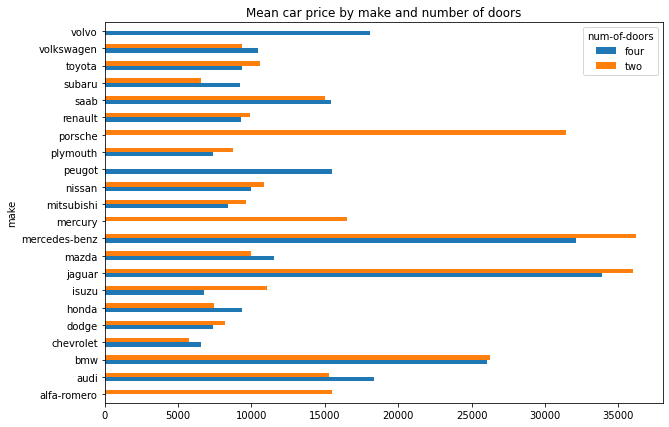

In [19]:
np.round(pd.pivot_table(data, values='price', 
                                index=['make'], 
                                columns=['num-of-doors'], 
                                aggfunc=np.mean,
                                fill_value=0),2).plot.barh(figsize=(10,7),
                                                          title='Mean car price by make and number of doors')


By simply adding .plot(), I am able to render this nice histograph of car makers, the number of doors of their cars, and the price of fuel.

From this, we can see that the least fuel efficient brand (for 4 doors) is mercedes and jaguar and that the most fuel efficient brand is plymouth, isuzu, and chevrolet.

## Pictures and plots are great, but let's work with numbers

I'll start by calculating from meaningful statistics: the mean and median price for car body style and the number of doors.

In [20]:
np.round(pd.pivot_table(data, values='price', 
                                index=['body-style'], 
                                columns=['num-of-doors'], 
                                aggfunc=[np.mean, np.median],
                                fill_value=0),2)

mean           median         
num-of-doors      four       two   four      two
body-style                                      
hardtop           0.00  22208.50      0  19687.5
wagon         12371.96      0.00  11694      0.0
sedan         14614.13  14283.00  12555   8678.0
hatchback      8372.00  10230.79   8073   8970.0
convertible       0.00  21890.50      0  17084.5

I think that the destinction between number of doors is important, but it isn't vital. 

In [21]:
np.round(pd.pivot_table(data, values='price', 
                                index=['body-style'], 
                                columns=['num-of-doors'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, margins_name='Total'),2)

sum                    
num-of-doors     four      two      Total
body-style                               
hardtop             0   177668   177668.0
wagon          309299        0   309299.0
sedan         1139902   199962  1339864.0
hatchback       83720   593386   677106.0
convertible         0   131343   131343.0
Total         1532921  1102359  2635280.0

awesome, now we have the sums of both!